In [1]:
#  Name:      Tom Bresee
#  Purpose:   EDA pt II of II
#  Dataset:   Base Dataset
#  Status:    Normalized Resale Prices 
#  Project:   Capstone

<br>

*View this notebook online via this link (easy to see)*

> 

<br>

*Notes:*

*1. All price values plotted have in fact been normalized (with inflation taken into consideration)* 

*2. Keep your eyes on the comparison of the resale price to various categories, it shows an enormous amount of insight*

<br>

<br>

In [2]:
# from mycreds import * 
# import warnings
# warnings.filterwarnings('ignore')
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# import numpy as np
# import pandas as pd
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', '{:.2f}'.format) 
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('TkAgg')
# %matplotlib inline  
# import glob  
# from datetime import datetime as dt
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from bokeh.layouts import column
# from bokeh.models import Div, TeX
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
# from sqlalchemy import create_engine
# output_notebook() # bokeh
# from mycreds import Capstone_AWS_RO
from mycreds import * 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob  
from datetime import datetime as dt
import pandas_profiling
from pandas_profiling import ProfileReport
# from bokeh.layouts import column
# from bokeh.models import Div, TeX
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
from sqlalchemy import create_engine
# output_notebook() # bokeh
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
cm = sns.light_palette("blue", as_cmap=True)
# correlations.style.set_caption('Correlation Values Ranked').background_gradient(cmap=cm)
# import shap
# shap.initjs()
# careful with this ! ~ ~ ~ 
import seaborn as sns
# sns.set(rc={"figure.dpi":90, 'savefig.dpi':300})
sns.set_context('notebook')
# sns.set_style("whitegrid")
sns.set_style("ticks")
import matplotlib_inline.backend_inline
from IPython.display import set_matplotlib_formats
import matplotlib
# matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set_matplotlib_formats('retina')
plt.rcParams['savefig.facecolor']='white'
cm = sns.light_palette("blue", as_cmap=True)

In [3]:
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

In [4]:
matplotlib.rcParams['figure.dpi'] = 150

In [5]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':150})

In [6]:
%matplotlib inline

<br>

In [7]:
df = pd.read_pickle('cleaned_baseline_data.pkl')  

In [8]:
len(df)

865814

In [9]:
len(df.columns)

29

In [10]:
sorted(list(df.columns))

['address',
 'block',
 'flat_model',
 'flat_type',
 'floor_area_sqm',
 'lease_commence_date',
 'month',
 'n_rooms',
 'price_per_sq_ft',
 'price_per_sq_ft_norm',
 'price_per_sq_ft_per_lease_yr',
 'price_per_sq_ft_per_lease_yr_norm',
 'price_per_sq_m',
 'price_per_sq_m_norm',
 'price_per_sq_m_per_lease_yr',
 'price_per_sq_m_per_lease_yr_norm',
 'region',
 'remaining_lease',
 'remaining_lease_months',
 'remaining_lease_years',
 'resale_price',
 'resale_price_norm',
 'storey_range',
 'storey_range_avg',
 'storey_range_max',
 'storey_range_min',
 'street_name',
 'town',
 'transaction_id']

In [11]:
df.head(1).T

,0
transaction_id,1990_01_159_YISHUN_ST_11_07_TO_09
month,1990-01-01 00:00:00
block,159
town,Yishun
street_name,YISHUN ST 11
address,159 YISHUN ST 11
storey_range,07 TO 09
storey_range_min,7
storey_range_max,9
flat_model,Improved


*Note:  This data has not been one-hot encoded, we will do that during feature engineering...*

### Towns

In [12]:
len(df.town.unique())

27

> 27 unique towns

### Resale Price (Norm) 

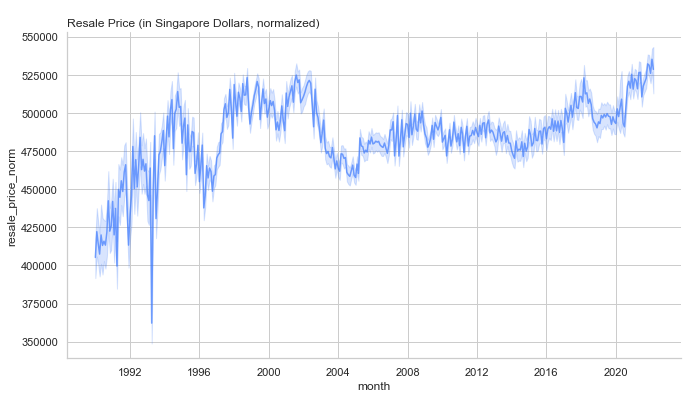

In [13]:
sns.set_style("whitegrid")
plt.subplots(figsize=(11,6))
sns.lineplot(data=df, x = "month", y="resale_price_norm", color = 'xkcd:lightish blue', alpha = 0.7)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('\nResale Price (in Singapore Dollars, normalized)',fontsize=12, loc="left"); 

<br><br>

### Distributions

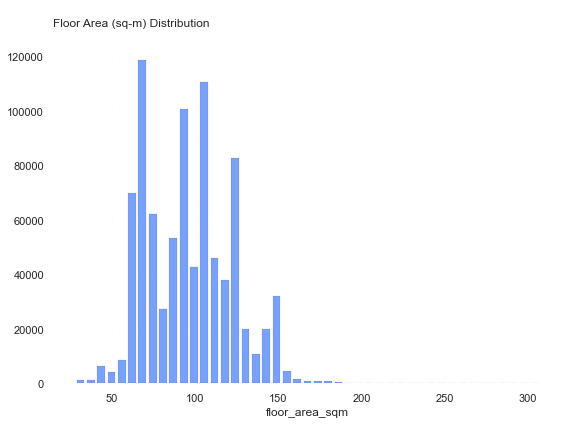

In [14]:
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.floor_area_sqm, 
             kde=False, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':4, 
                      "linewidth":.9, 
                      'alpha':.6},
             hist_kws={"linewidth": .10, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":0.75},
             bins=45)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nFloor Area (sq-m) Distribution\n',fontsize=12, loc="left")
 
plt.grid(linestyle='--', alpha=0.03)
plt.tight_layout()
plt.show();

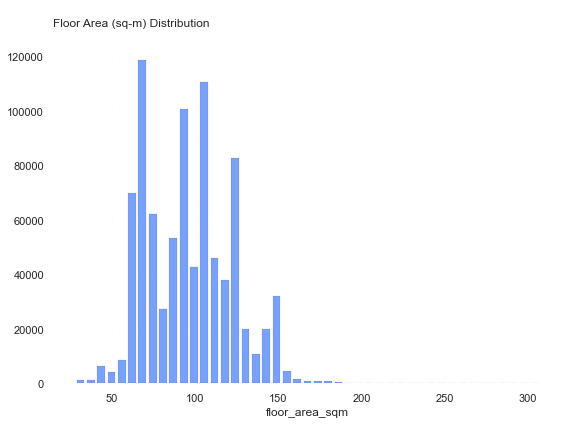

In [14]:
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.floor_area_sqm, 
             kde=False, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':4, 
                      "linewidth":.9, 
                      'alpha':.6},
             hist_kws={"linewidth": .10, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":0.75},
             bins=45)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nFloor Area (sq-m) Distribution\n',fontsize=12, loc="left")
 
plt.grid(linestyle='--', alpha=0.03)
plt.tight_layout()
plt.show();

In [16]:
# where town are the very largest flats located ? 
df[df['floor_area_sqm']> 220]['town'] 
# plot above 

30889     Kallang/Whampoa
31932     Kallang/Whampoa
47032     Kallang/Whampoa
51711     Kallang/Whampoa
53774     Kallang/Whampoa
68776     Kallang/Whampoa
81376              Bishan
83443              Bishan
88361     Kallang/Whampoa
94264              Bishan
96399              Bishan
115433    Kallang/Whampoa
126105    Kallang/Whampoa
135236    Kallang/Whampoa
147163    Kallang/Whampoa
152893             Bishan
157439    Kallang/Whampoa
163407    Kallang/Whampoa
166343    Kallang/Whampoa
169528             Bishan
198125             Bishan
206773             Bishan
210043    Kallang/Whampoa
246935    Kallang/Whampoa
252710          Woodlands
281785    Kallang/Whampoa
285863             Bishan
310035    Kallang/Whampoa
310045    Kallang/Whampoa
331283    Kallang/Whampoa
344670          Woodlands
354267    Kallang/Whampoa
370013    Kallang/Whampoa
382369    Kallang/Whampoa
391343    Kallang/Whampoa
420936             Bishan
442780    Kallang/Whampoa
447241    Kallang/Whampoa
460994      

In [17]:
df[df['floor_area_sqm']> 220]['town'].value_counts()

Kallang/Whampoa    49
Bishan             16
Woodlands           4
Name: town, dtype: int64

> Town: Kallang/Whampoa has the very largest flats...

They do exist this big, they are called jumbo HDBs !  

https://www.99.co/singapore/insider/jumbo-hdb-flats/

<br>

In [18]:
df[df['floor_area_sqm']> 200]['flat_model'].value_counts()

Terrace               64
Maisonette            16
Premium Maisonette     7
Apartment              4
Adjoined Flat          1
Name: flat_model, dtype: int64

> these are not data typos, they are really HDB flats... they may be outliers but they are legit

---

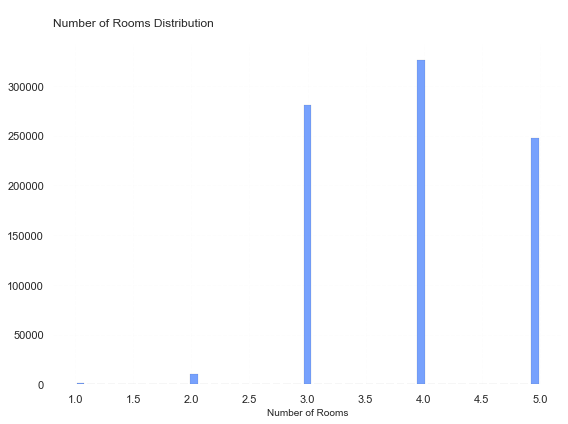

In [19]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.n_rooms,
             kde=False,
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':4, 
                      "linewidth":.9, 
                      'alpha':.6},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=45)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nNumber of Rooms Distribution\n',fontsize=12, loc="left")
plt.xlabel('Number of Rooms', fontsize=10)
plt.ylabel('')
plt.grid(linestyle='--', alpha=0.03)
plt.tight_layout()
plt.show();

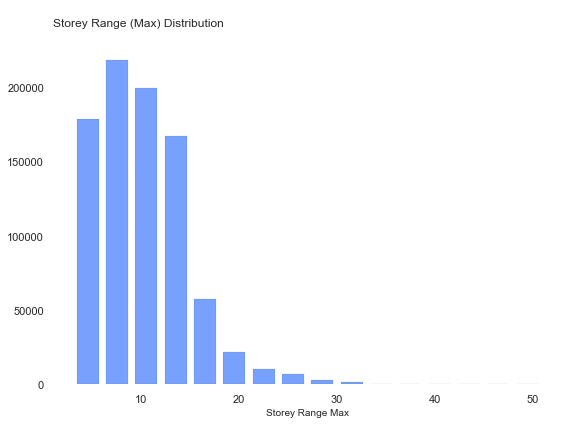

In [20]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.storey_range_max, 
             kde=False, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':4, 
                      "linewidth":.9, 
                      'alpha':.6},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=16,
             )

sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nStorey Range (Max) Distribution\n',fontsize=12, loc="left")
plt.xlabel('Storey Range Max', fontsize=10)
plt.ylabel('')
plt.grid(linestyle='--', alpha=0.03)
plt.tight_layout()
plt.show();

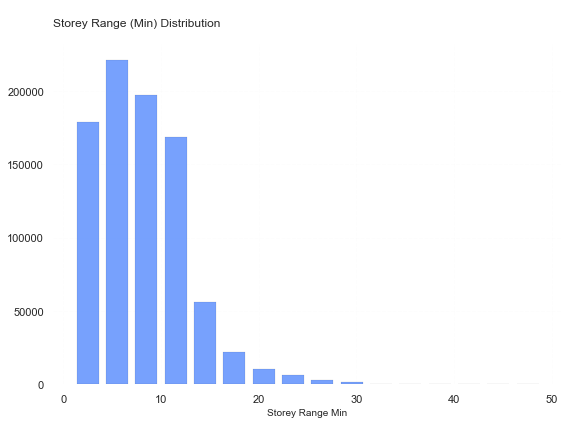

In [21]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.storey_range_min, 
             kde=False, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':.3, 
                      "linewidth":.9, 
                      'alpha':.6},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=16,
             )

sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nStorey Range (Min) Distribution\n',fontsize=12, loc="left")
plt.xlabel('Storey Range Min', fontsize=10)
plt.ylabel('')
plt.grid(linestyle='--', alpha=0.03)
plt.tight_layout()
plt.show();

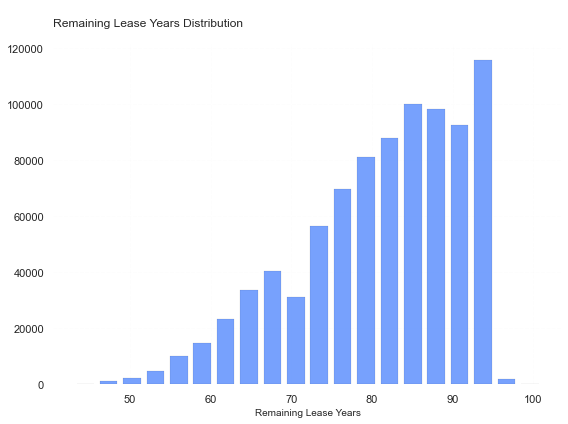

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.remaining_lease_years, 
             kde=False, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':4, 
                      "linewidth":.9, 
                      'alpha':.6},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=20,
             )

sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nRemaining Lease Years Distribution\n',fontsize=12, loc="left")
plt.grid(linestyle='--', alpha=0.03)
plt.xlabel('Remaining Lease Years', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show();

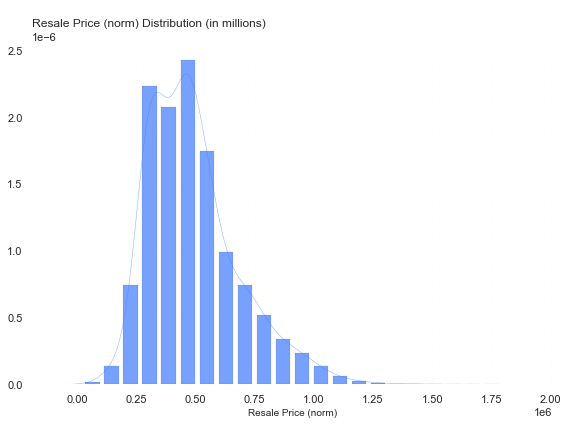

In [23]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.resale_price_norm, 
             kde=True,
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':.2, 
                      "linewidth":.5, 
                      'alpha':.6},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=22)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nResale Price (norm) Distribution (in millions)\n',fontsize=12, loc="left")
plt.grid(linestyle='--', alpha=0.03)
plt.xlabel('Resale Price (norm)', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show();

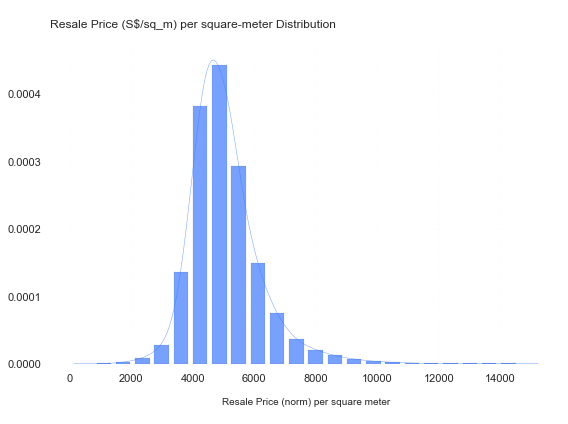

In [24]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.price_per_sq_m_norm, 
             kde=True, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':.2, 
                      "linewidth":.5, 
                      'alpha':.7},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=22)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nResale Price (S$/sq_m) per square-meter Distribution \n',fontsize=12, loc="left")
plt.grid(linestyle='--', alpha=0.03)
plt.xlabel('\nResale Price (norm) per square meter\n', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show();
# as you can see, this is pretty much a normal distribution ... 

In [25]:
df.dtypes

transaction_id                               object
month                                datetime64[ns]
block                                        object
town                                         object
street_name                                  object
address                                      object
storey_range                                 object
storey_range_min                              int64
storey_range_max                              int64
flat_model                                   object
flat_type                                    object
n_rooms                                       int64
floor_area_sqm                              float64
lease_commence_date                           int64
remaining_lease                              object
remaining_lease_years                         int64
remaining_lease_months                      float64
resale_price                                float64
price_per_sq_ft                             float64
price_per_sq

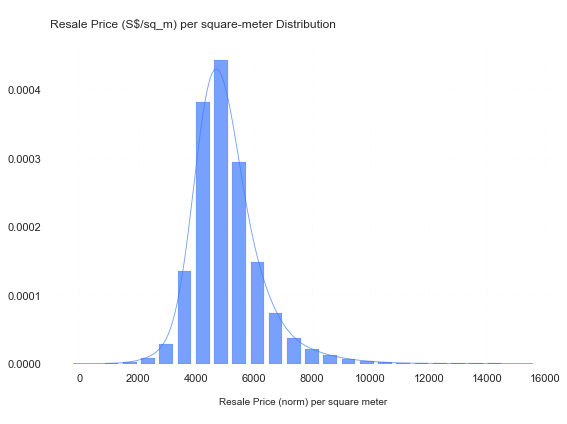

In [26]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.price_per_sq_m_norm, 
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':.3, 
                      "linewidth":.9, 
                      'alpha':.7},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.7, 
                       "rwidth":.75},
             bins=22)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nResale Price (S$/sq_m) per square-meter Distribution \n',fontsize=12, loc="left")
plt.grid(linestyle='--', alpha=0.03)
plt.xlabel('\nResale Price (norm) per square meter\n', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show();

# as you can see, this is pretty much a normal distribution ... 

<br>

<br>

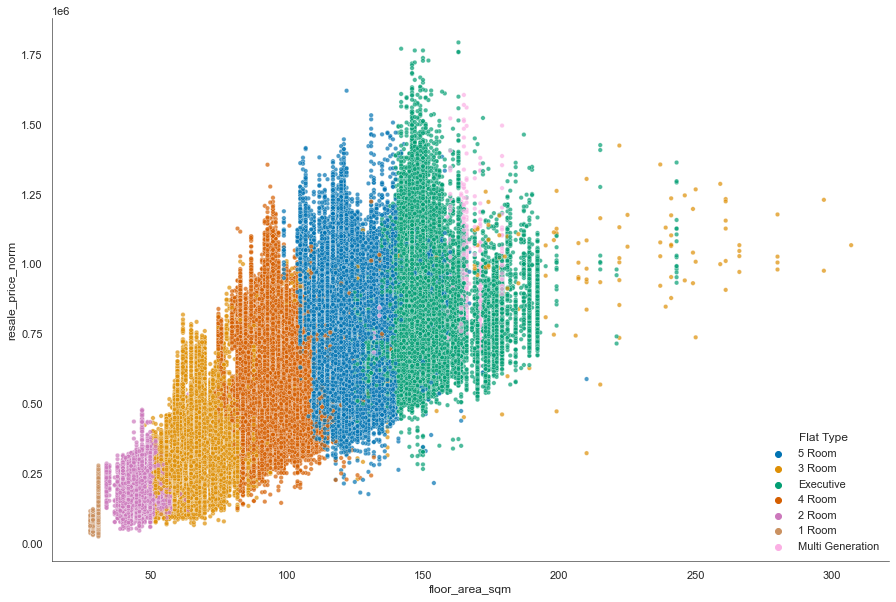

In [82]:

plt.figure(figsize=(15,10))
sns.scatterplot(x="floor_area_sqm", y="resale_price_norm", 
                alpha = .7, hue = "flat_type", 
                # palette="muted", 
                palette='colorblind',
                s=20, 
                data=df)
plt.legend(frameon=False, loc='lower right', title='Flat Type')
sns.despine(top=True, right=True, left=False, bottom=False); 


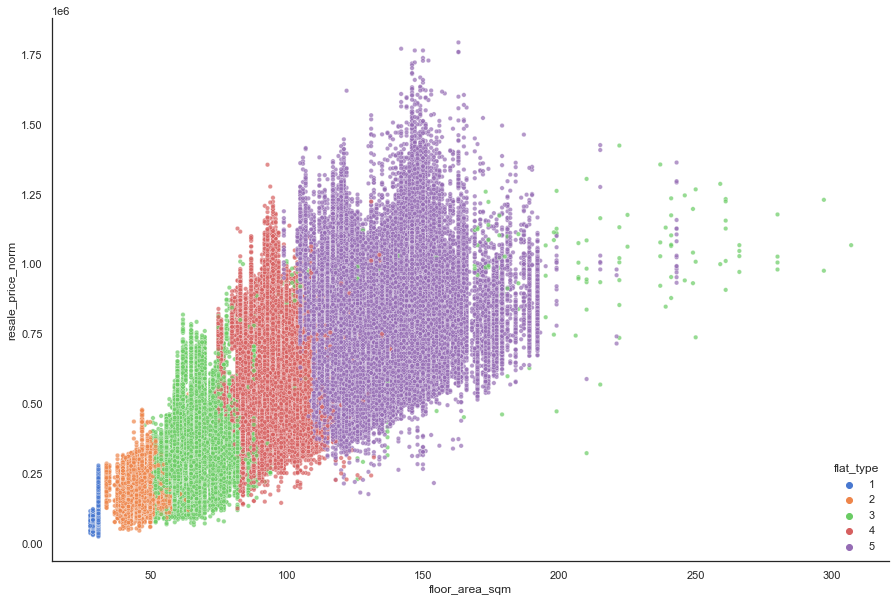

In [56]:

plt.figure(figsize=(15,10))
sns.scatterplot(x="floor_area_sqm", y="resale_price_norm", 
                alpha = .7, hue = "n_rooms", palette="muted", 
                # palette='colorblind',
                s=20, 
                data=df)
plt.legend(frameon=False, loc='lower right', title='flat_type')
sns.despine(top=True, right=True, left=False, bottom=False); 


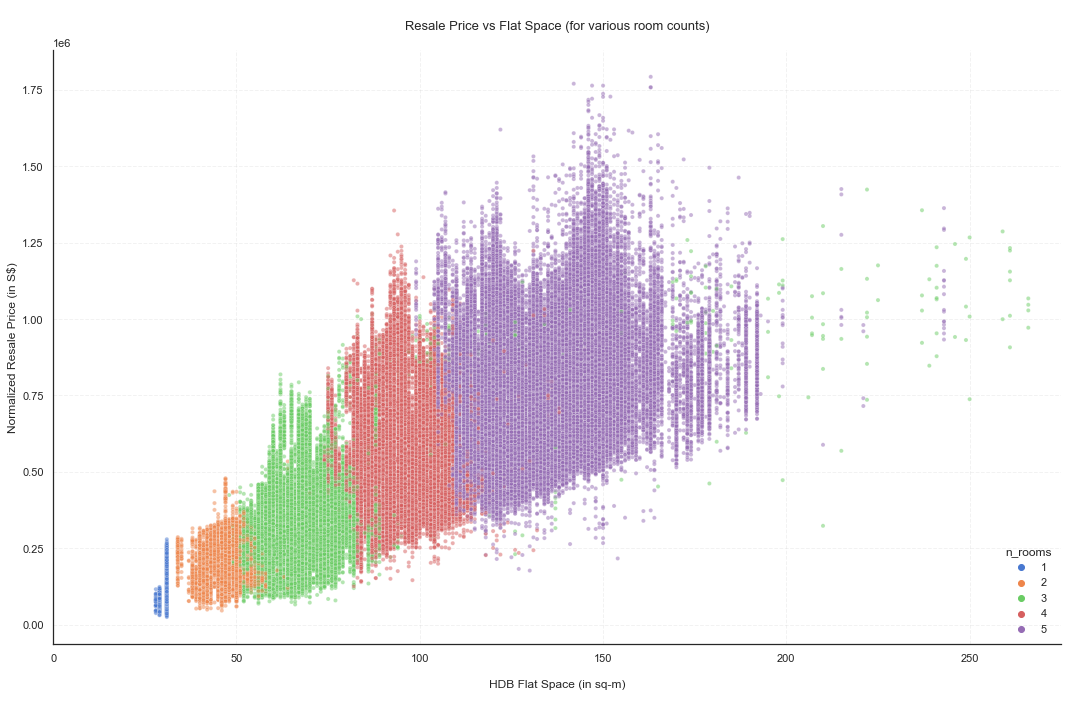

In [69]:

plt.figure(figsize=(15,10))
sns.scatterplot(x="floor_area_sqm",
                y="resale_price_norm", 
                alpha = .5, 
                hue = "n_rooms", 
                palette="muted", 
                # palette='colorblind',
                s=17, 
                data=df)
plt.legend(frameon=False, loc='lower right', title='n_rooms')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('\nResale Price vs Flat Space (for various room counts)\n',fontsize=13, loc="center")
plt.grid(linestyle='--', alpha=0.25)
plt.xlabel('\nHDB Flat Space (in sq-m)\n', fontsize=12)
plt.ylabel('Normalized Resale Price (in S$)')
plt.xlim(0, 275)
plt.tight_layout()
# plt.show()
plt.savefig('demo.png', dpi=200); 


In [71]:

from PIL import Image
img_path = "demo.png"
img = Image.open(img_path)
img = img.convert("P", palette=Image.ADAPTIVE, colors=256)
img.save("comp.png", optimize=True)


In [53]:

# plt.figure(figsize=(15,10))
# sns.scatterplot(x="n_rooms", y="resale_price_norm", 
#                 alpha = .7, hue = "n_rooms", palette="muted", 
#                 # palette='colorblind',
#                 s=20, 
#                 data=df)
# plt.legend(frameon=False, title='n_rooms')
# sns.despine(top=True, right=True, left=False, bottom=False); 


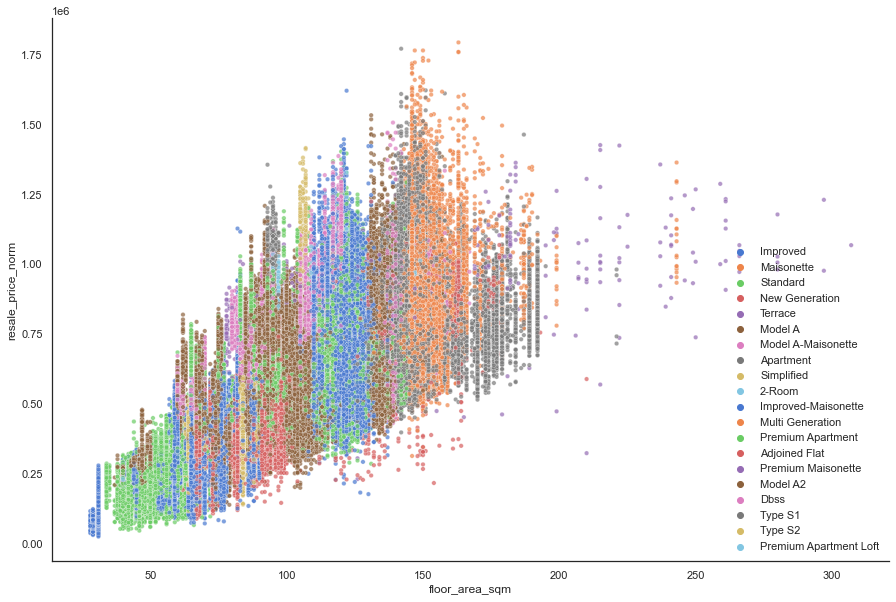

In [45]:

plt.figure(figsize=(15,10))
sns.scatterplot(x="floor_area_sqm", y="resale_price_norm", 
                alpha = .7, hue = "flat_model", palette="muted", 
                # palette='colorblind',
                s=20, 
                data=df)
plt.legend(frameon=False)
sns.despine(top=True, right=True, left=False, bottom=False); 


In [48]:
df.dtypes

transaction_id                               object
month                                datetime64[ns]
block                                        object
town                                         object
street_name                                  object
address                                      object
storey_range                                 object
storey_range_min                              int64
storey_range_max                              int64
flat_model                                   object
flat_type                                    object
n_rooms                                       int64
floor_area_sqm                              float64
lease_commence_date                           int64
remaining_lease                              object
remaining_lease_years                         int64
remaining_lease_months                      float64
resale_price                                float64
price_per_sq_ft                             float64
price_per_sq

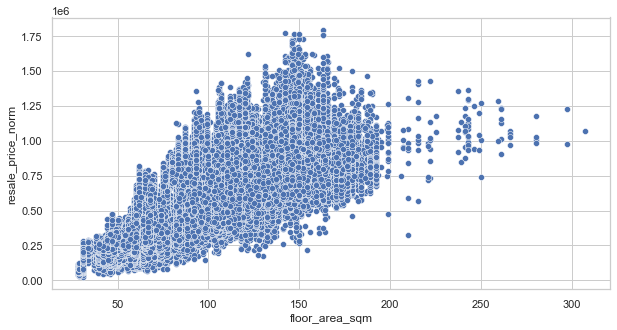

In [32]:

plt.figure(figsize=(10,5))  # , dpi=1000)
sns.scatterplot(x="floor_area_sqm", y="resale_price_norm",data=df);

# plt.show();
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


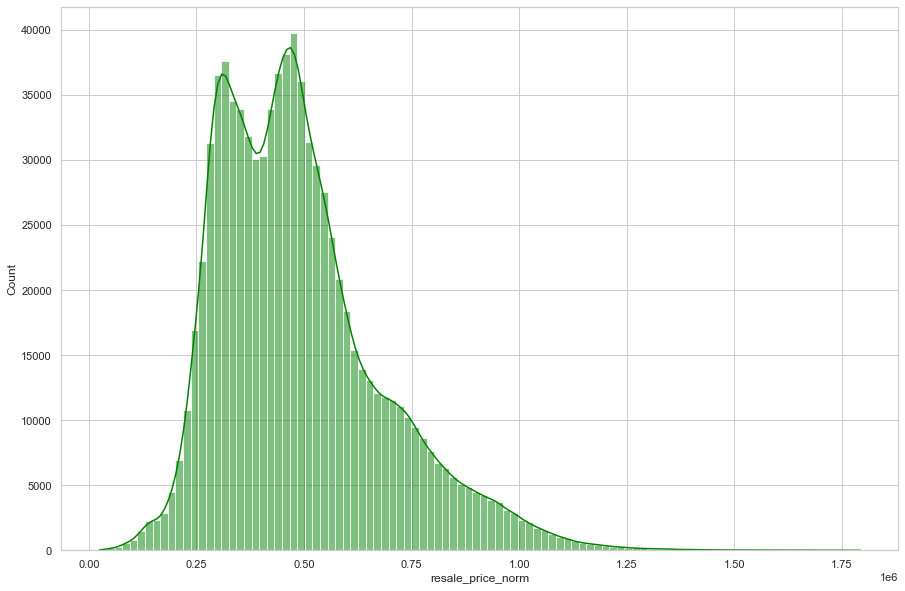

In [29]:

plt.figure(figsize=(15,10))
sns.histplot(data=df, x="resale_price_norm", color="green", kde=True, bins=100)
plt.show();


<br>

### Resale Flat Price (in Singapore $ normalized)  Comparisons

**All resale flat pricing values have been normalized...**

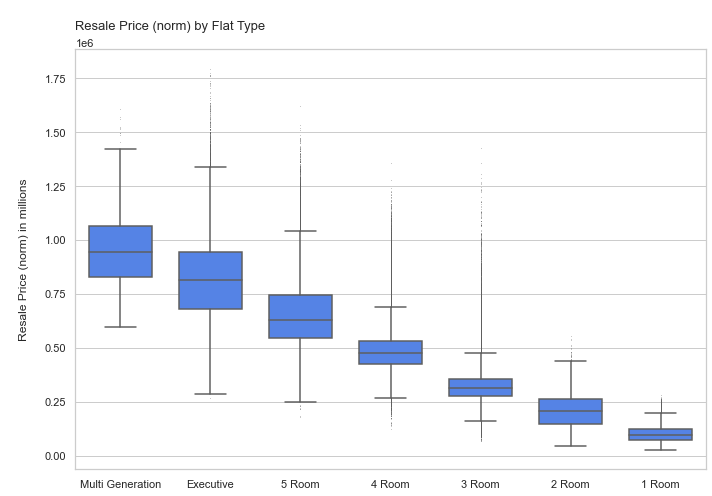

In [27]:

my_order = df.groupby(by=["flat_type"])["resale_price_norm"].median().iloc[::-1].index
 
flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('\nResale Price (norm) by Flat Type\n', 
             fontsize=13, 
             loc='left')

sns.boxplot(x='flat_type',
            y='resale_price_norm',
            data=df,
            ax=ax,
            color = 'xkcd:lightish blue', 
            # palette="Blues",
            showfliers=True,
            width=.7,
            order = my_order,
            flierprops=flierprops)

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


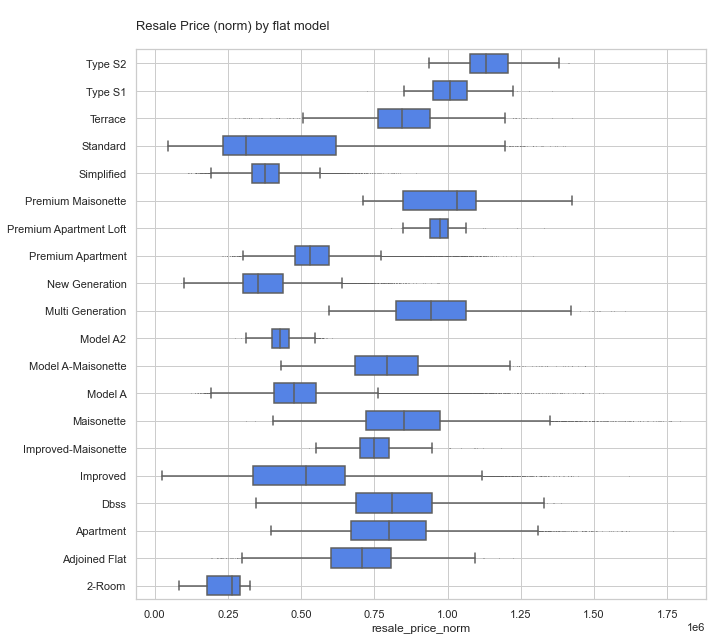

In [28]:

my_order = df.groupby(by=["flat_model"])["resale_price_norm"].median().iloc[::-1].index
 
fig, ax = plt.subplots(figsize=(10,9))

ax = sns.boxplot(y='flat_model',
            x='resale_price_norm',
            data=df,
            ax=ax,
            color = 'xkcd:lightish blue', 
            showfliers=True,
            width=.7,
            # palette="Blues", 
            order = my_order,
            flierprops=flierprops)

ax.set_title('\nResale Price (norm) by flat model\n', 
             fontsize=13, 
             loc='left')

ax.yaxis.grid(True)   
ax.xaxis.grid(True)  # Hide x-axis gridlines 
ax.set(ylabel="")
# ax.set(xlabel="\nResale Price (norm) in millions")
plt.tight_layout()
plt.show();


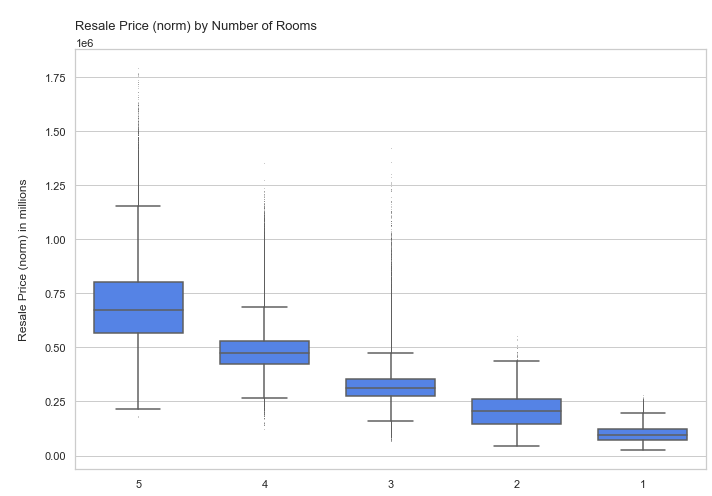

In [29]:

my_order = df.groupby(by=["n_rooms"])["resale_price_norm"].median().iloc[::-1].index
 
flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('\nResale Price (norm) by Number of Rooms\n', 
             fontsize=13, 
             loc='left')

sns.boxplot(x='n_rooms',
            y='resale_price_norm',
            data=df,
            ax=ax,
            color = 'xkcd:lightish blue', 
            # palette="Blues", 
            showfliers=True,
            width=.7,
            order = my_order,
            flierprops=flierprops)

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


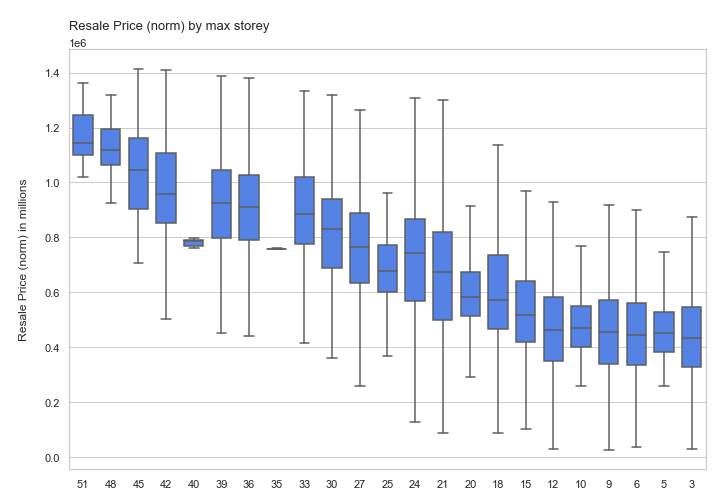

In [30]:

my_order = df.groupby(by=["storey_range_max"])["resale_price_norm"].median().iloc[::-1].index
 
flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('\nResale Price (norm) by max storey\n', 
             fontsize=13, 
             loc='left')

sns.boxplot(x='storey_range_max',
            y='resale_price_norm',
            data=df,
            ax=ax,
            # palette="Blues", 
            color = 'xkcd:lightish blue', 
            showfliers=False,
            width=.7,
            order = my_order,
            flierprops=flierprops)

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


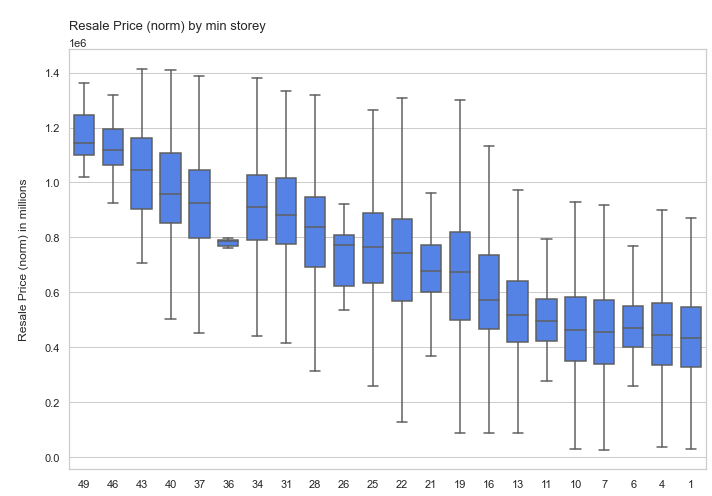

In [31]:

my_order = df.groupby(by=["storey_range_min"])["resale_price_norm"].median().iloc[::-1].index
 
flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('\nResale Price (norm) by min storey\n', 
             fontsize=13, 
             loc='left')

sns.boxplot(x='storey_range_min',
            y='resale_price_norm',
            data=df,
            ax=ax,
            # palette="Blues", 
            color = 'xkcd:lightish blue', 
            showfliers=False,
            width=.7,
            order = my_order,
            flierprops=flierprops)


ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


###  Price per sqm (norm)

In [32]:
# import seaborn as sns
# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(7.5,6.5))
# sns.distplot(df.floor_area_sqm, 
#              kde=False, 
#              color='navy',
#              kde_kws={'bw':4, 
#                       "linewidth":.9, 
#                       'alpha':.6},
#              hist_kws={"linewidth": .10, 
#                        'edgecolor':'black',
#                        'alpha':.8, 
#                        "rwidth":0.75},
#              bins=35)
# sns.despine(top=True, right=True, left=True, bottom=True)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# ax.set_yticklabels([])
# plt.title('\nFloor Area (sq-m) Distribution',fontsize=12, loc="left")
# ax.set(xlabel="\nFloor Area (sqm)\n")
# ax.set(ylabel="")
# plt.grid(linestyle='--', alpha=0.03)
# plt.tight_layout()
# plt.show();

<br>

## More

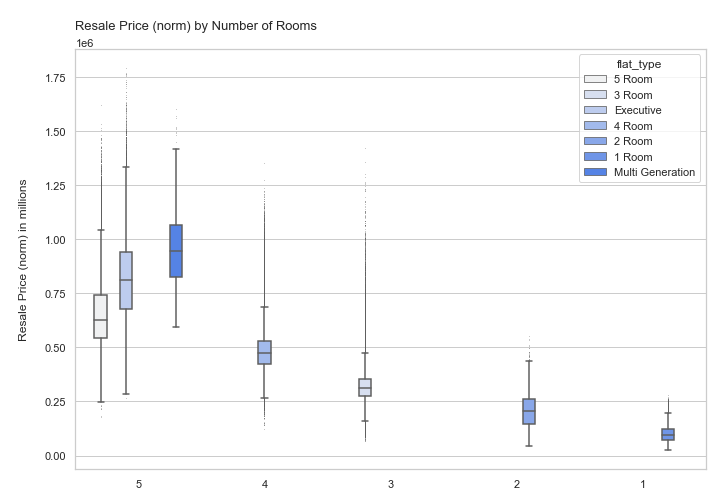

In [33]:

my_order = df.groupby(by=["n_rooms"])["resale_price_norm"].median().iloc[::-1].index
 
flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(10,7))

ax = sns.boxplot(x='n_rooms',
            y='resale_price_norm',
            data=df,
            hue = 'flat_type',
            ax=ax,
            color = 'xkcd:lightish blue', 
            showfliers=True,
            width=.7,
            order = my_order,
            flierprops=flierprops)

ax.set_title('\nResale Price (norm) by Number of Rooms\n', 
             fontsize=13, 
             loc='left')

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


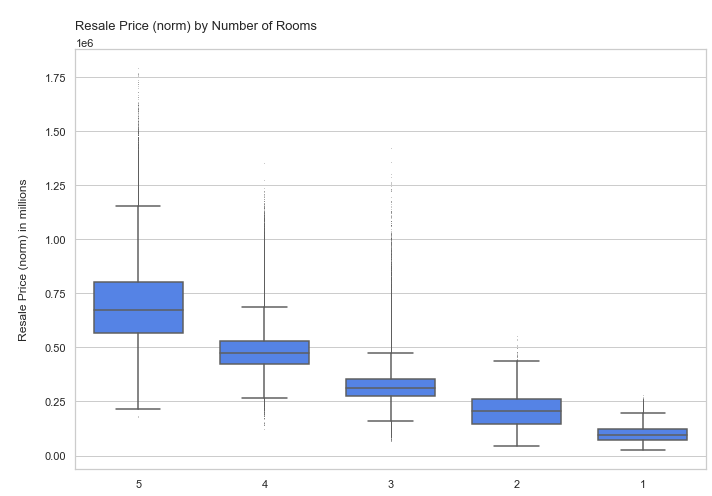

In [34]:

my_order = df.groupby(by=["n_rooms"])["resale_price_norm"].median().iloc[::-1].index

flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x='n_rooms',
            y='resale_price_norm',
            data=df,
            ax=ax,
            color = 'xkcd:lightish blue', 
            showfliers=True,
            width=.7,
            # palette="Blues", 
            order = my_order,
            flierprops=flierprops)
ax.set_title('\nResale Price (norm) by Number of Rooms\n', 
             fontsize=13, 
             loc='left')
ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


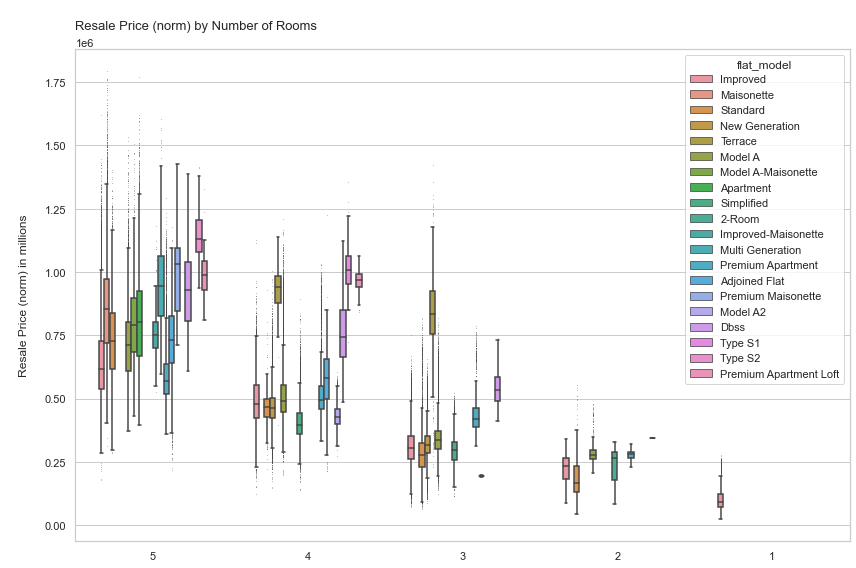

In [35]:

my_order = df.groupby(by=["n_rooms"])["resale_price_norm"].median().iloc[::-1].index

flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(12,8))

ax = sns.boxplot(x='n_rooms',
            y='resale_price_norm',
            data=df,
            hue = 'flat_model',
            ax=ax,
            # color = 'xkcd:lightish blue', 
            showfliers=True,
            width=.7,
            # palette="Blues", 
            order = my_order,
            flierprops=flierprops)

ax.set_title('\nResale Price (norm) by Number of Rooms\n', 
             fontsize=13, 
             loc='left')

ax.yaxis.grid(True)  
ax.xaxis.grid(False) 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


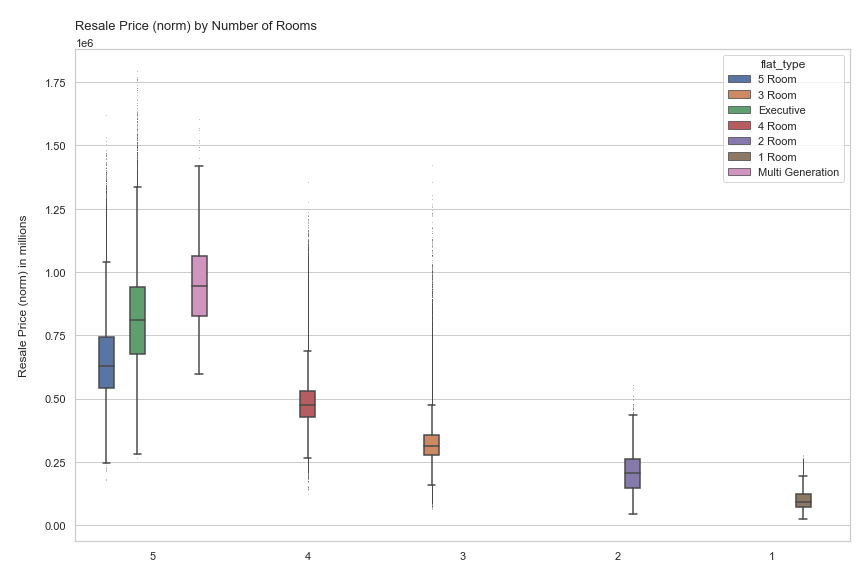

In [36]:

my_order = df.groupby(by=["n_rooms"])["resale_price_norm"].median().iloc[::-1].index

flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(12,8))

ax = sns.boxplot(x='n_rooms',
            y='resale_price_norm',
            data=df,
            hue = 'flat_type',
            ax=ax,
            # color = 'xkcd:lightish blue', 
            showfliers=True,
            width=.7,
            # palette="Blues", 
            order = my_order,
            flierprops=flierprops)

ax.set_title('\nResale Price (norm) by Number of Rooms\n', 
             fontsize=13, 
             loc='left')

ax.yaxis.grid(True)  
ax.xaxis.grid(False) 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


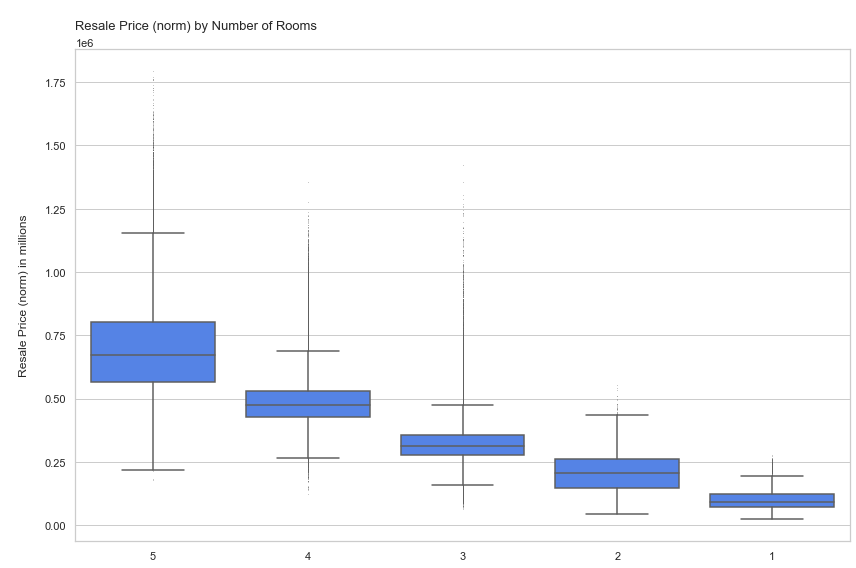

In [37]:

my_order = df.groupby(by=["n_rooms"])["resale_price_norm"].median().iloc[::-1].index

flierprops = dict(markerfacecolor='0.75', 
                  markersize=.1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(12,8))

ax = sns.boxplot(x='n_rooms',
            y='resale_price_norm',
            data=df,
            ax=ax,
            color = 'xkcd:lightish blue', 
            # lor='navy',
            showfliers=True,
            width=.8,
            order = my_order,
            flierprops=flierprops)

ax.set_title('\nResale Price (norm) by Number of Rooms\n', 
             fontsize=13, 
             loc='left')

ax.yaxis.grid(True)  
ax.xaxis.grid(False) 
ax.set(xlabel="")
ax.set(ylabel="\nResale Price (norm) in millions\n")
plt.tight_layout()
plt.show();


<br>

<br>

<br><br>

## Ridge Plots

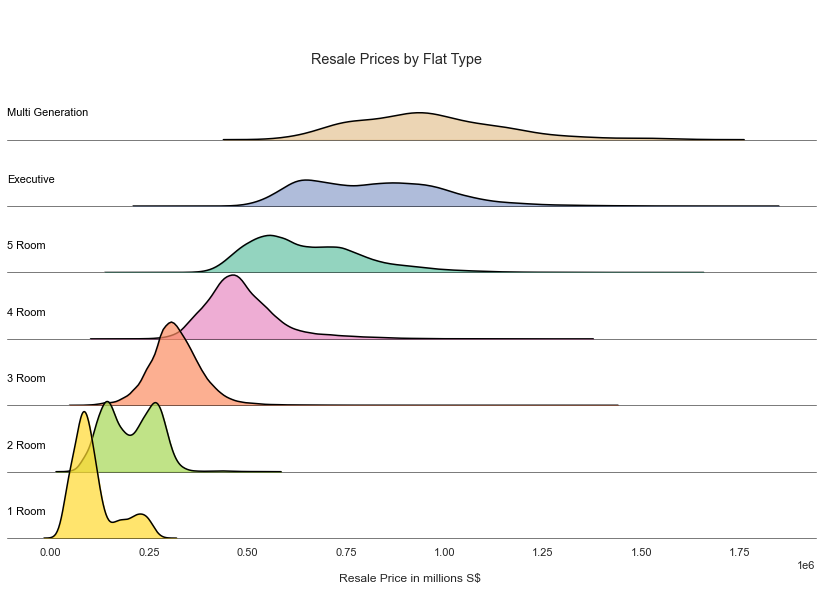

In [38]:
row_order= list(df.groupby("flat_type").resale_price_norm.mean().sort_values(ascending=False).index)
# ['Multi Generation',
#  'Executive',
#  '5 Room',
#  '4 Room',
#  '3 Room',
#  '2 Room',
#  '1 Room']
# order = df.groupby("flat_type").resale_price_norm.mean().sort_values(ascending=False).index
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)   
g = sns.FacetGrid(df, palette=palette, row="flat_type", hue="flat_type",
                      aspect=10, height=1.2, row_order=row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label_me(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label_me, "flat_type")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("") # blank it out ! 
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True) # prettier 
plt.suptitle('Resale Prices by Flat Type', y=0.88)
plt.show();
# plt.savefig('ridgeplot_resale_by_flat_type.png', dpi=100) 

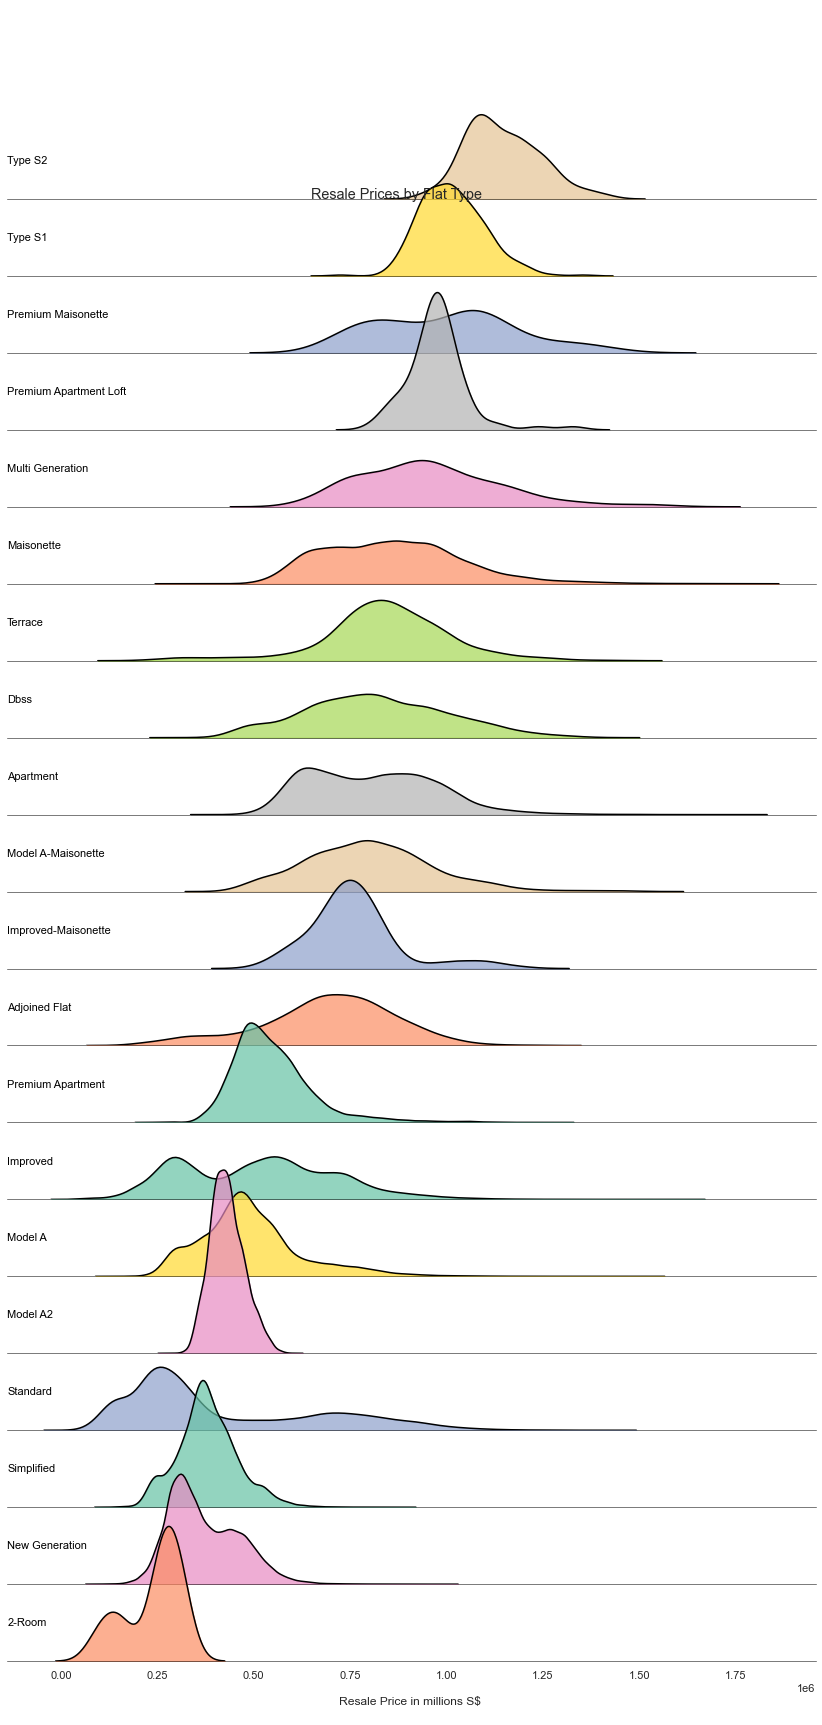

In [39]:
row_order= list(df.groupby("flat_model").resale_price_norm.mean().sort_values(ascending=False).index)
# ['Multi Generation',
#  'Executive',
#  '5 Room',
#  '4 Room',
#  '3 Room',
#  '2 Room',
#  '1 Room']
# order = df.groupby("flat_type").resale_price_norm.mean().sort_values(ascending=False).index
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)   
g = sns.FacetGrid(df, palette=palette, row="flat_model", hue="flat_model",
                      aspect=10, height=1.2, row_order=row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label_me(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label_me, "flat_model")
g.fig.subplots_adjust(hspace=-.6)
g.set_titles("") # blank it out ! 
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True) # prettier 
plt.suptitle('Resale Prices by Flat Type', y=0.88)
# plt.show();
plt.savefig('ridgeplot_resale_by_flat_model.png', dpi=100);  

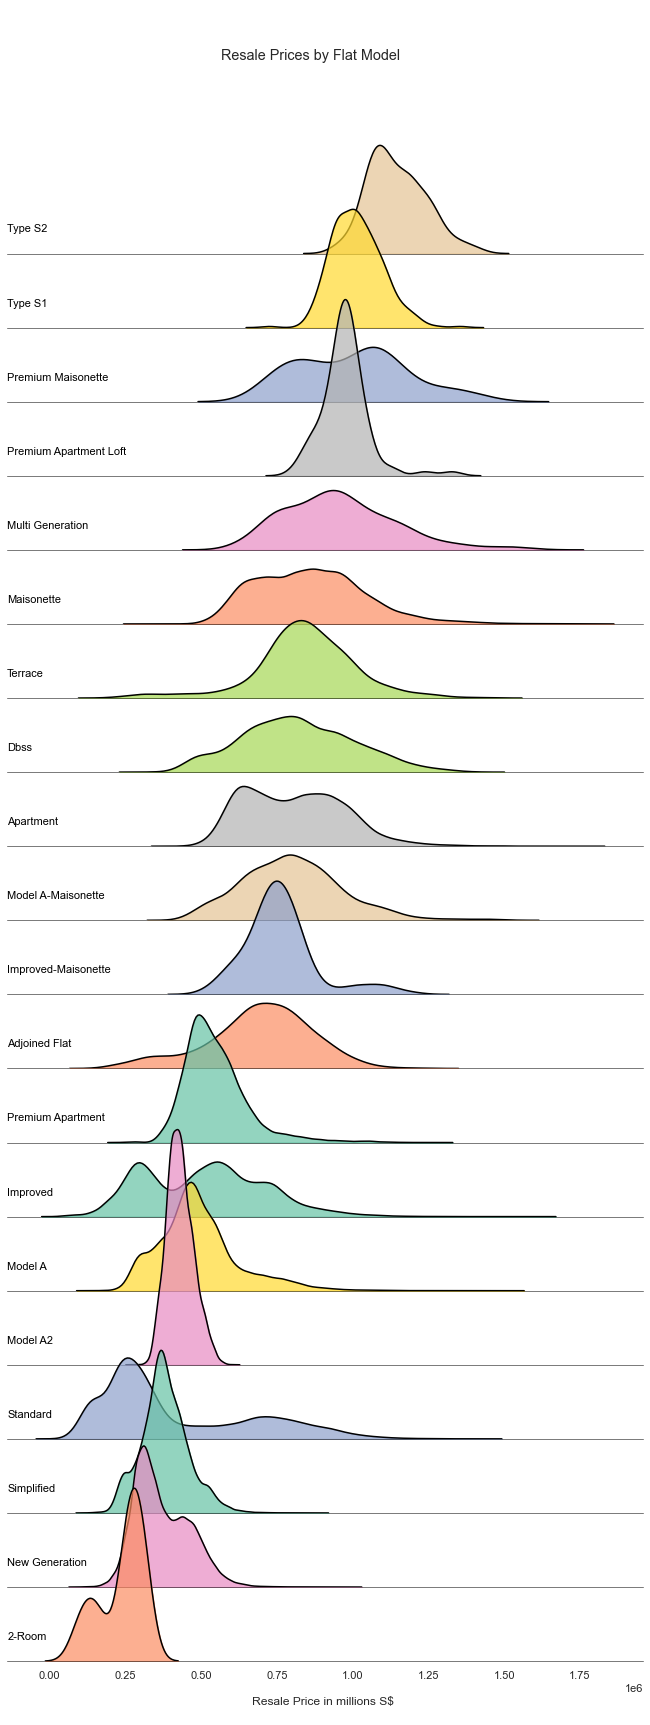

In [48]:

row_order= list(df.groupby("flat_model").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="flat_model", hue="flat_model", 
                  aspect=8, height=1.2, row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.1, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "flat_model")
g.fig.subplots_adjust(hspace=-.7)
g.set_titles("")
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True)
plt.suptitle('Resale Prices by Flat Model', y=0.96)
plt.show();
# plt.savefig('ridgeplot_resale_by_flat_model.png', dpi=100); 


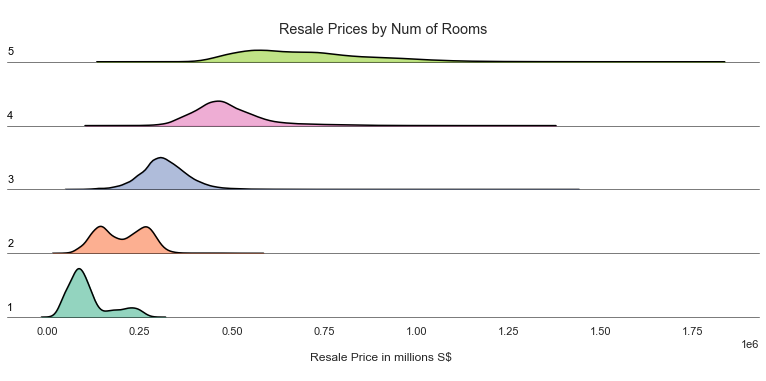

In [73]:

row_order= list(df.groupby("n_rooms").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="n_rooms", hue="n_rooms", aspect=9, height=1.2,
                 row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "n_rooms")
g.fig.subplots_adjust(hspace=-.6)
g.set_titles("")
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True)
plt.suptitle('\nResale Prices by Num of Rooms', y=0.88)
# plt.show();
plt.tight_layout()
plt.savefig('ridgeplot_resale_by_num_rooms_v2.png', dpi=200);


In [80]:

from PIL import Image
img_path = "residuals_random_forest_regressor_baseline.png"
img = Image.open(img_path)
img = img.convert("P", palette=Image.ADAPTIVE, colors=256)
img.save("comp2.png", optimize=True)


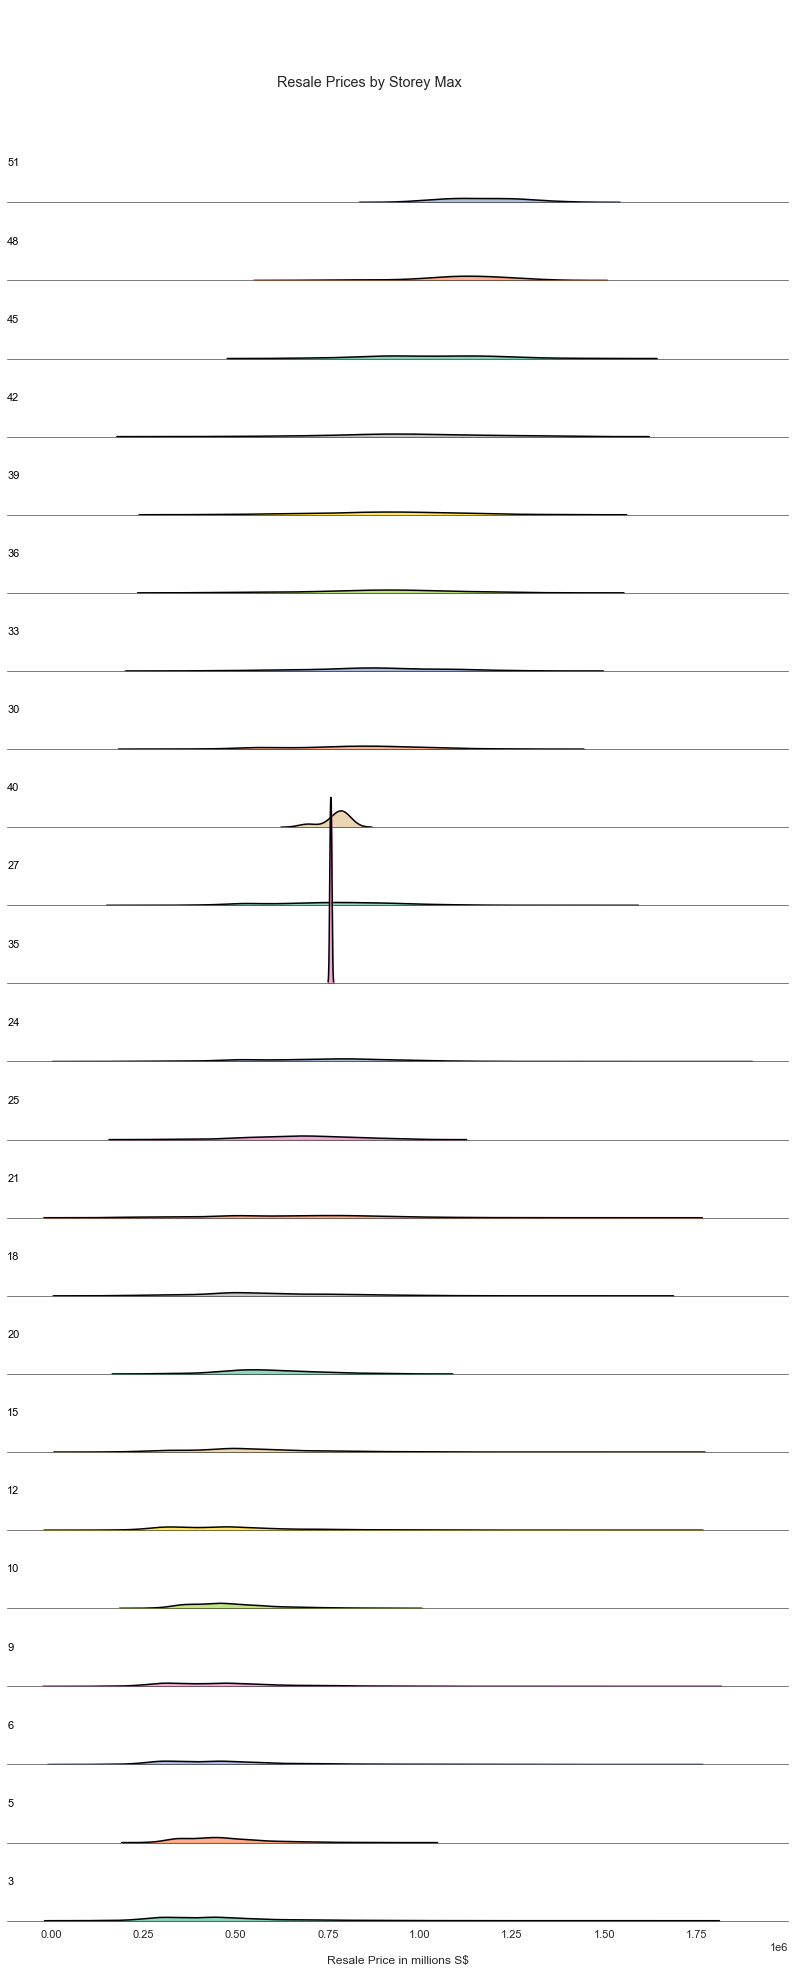

In [42]:

row_order= list(df.groupby("storey_range_max").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="storey_range_max", hue="storey_range_max", aspect=10, height=1.2,
                 row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "storey_range_max")
g.fig.subplots_adjust(hspace=-.6)
g.set_titles("")
g.set(yticks=[], xlabel="\nResale Price in millions S$", ylabel="")
g.despine(left=True)
plt.suptitle('\nResale Prices by Storey Max', y=0.96)
plt.show();
# plt.savefig('ridgeplot_resale_by_max_storey.png', dpi=100);


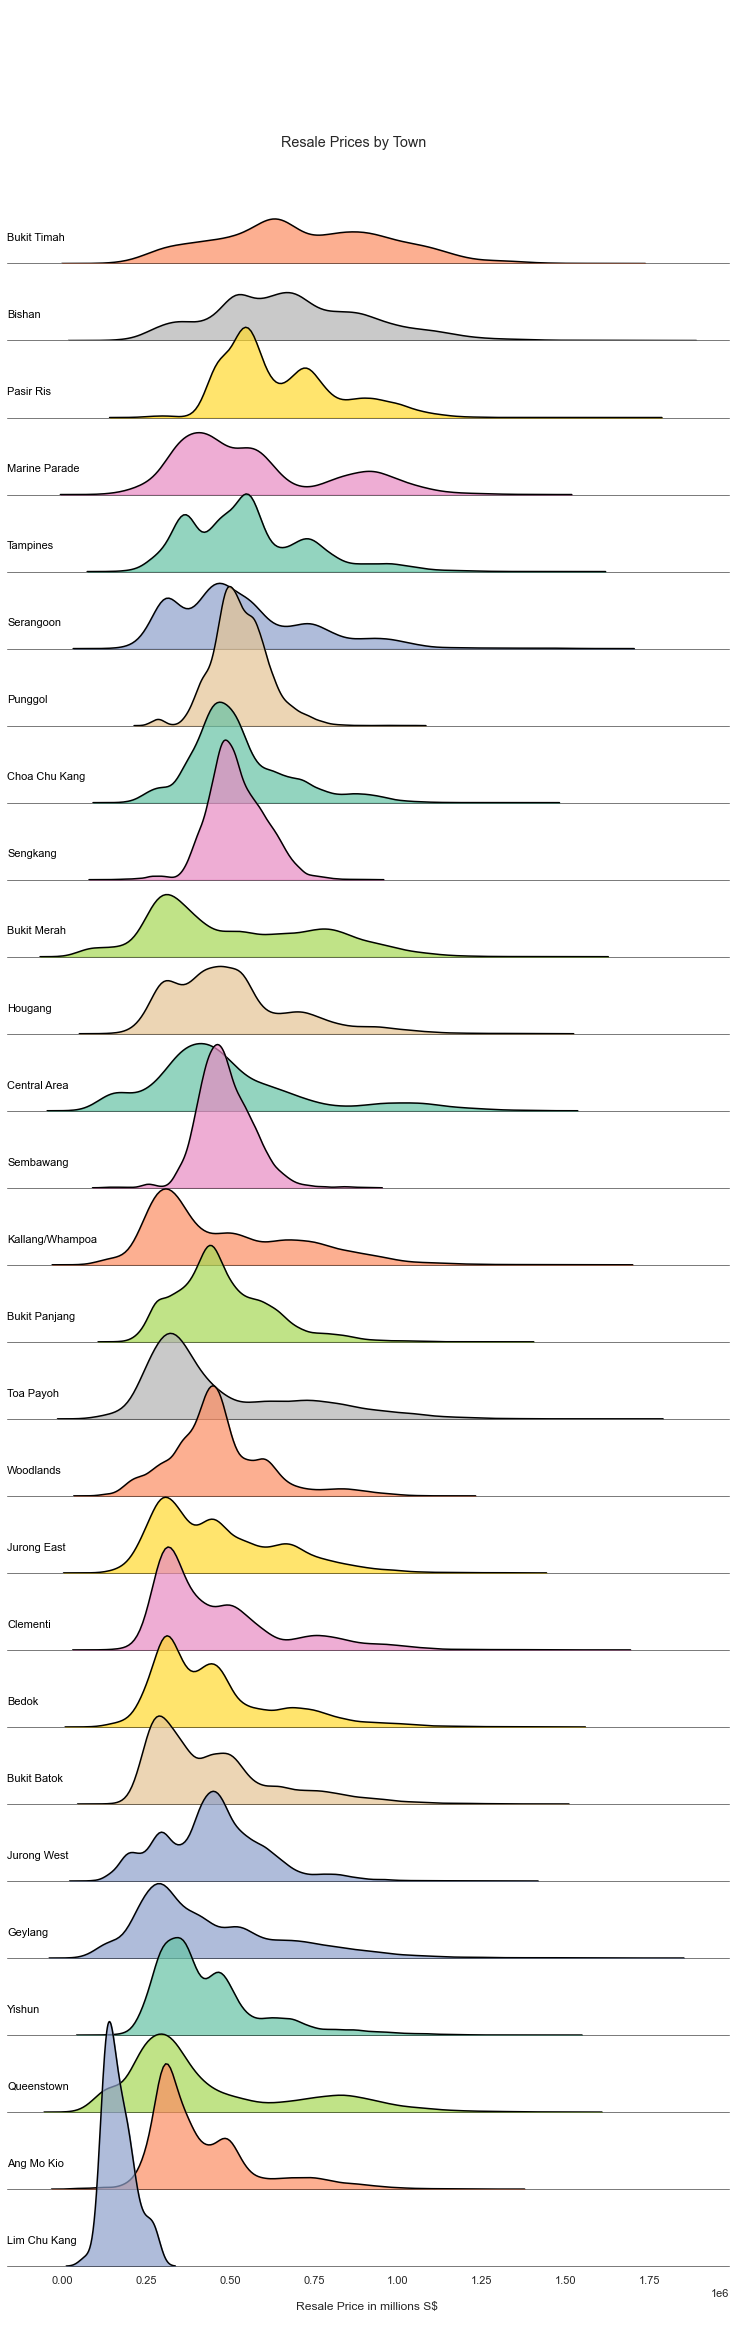

In [43]:

row_order= list(df.groupby("town").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 20)
g = sns.FacetGrid(df, palette=palette, row="town", 
                  hue="town", aspect=9, height=1.2, 
                  row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .1, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "town")
g.fig.subplots_adjust(hspace=-.7)
g.set_titles("")
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True)
plt.suptitle('\nResale Prices by Town', y=0.94)
plt.show(); 
# plt.savefig('ridgeplot_resale_by_town.png', dpi=100);


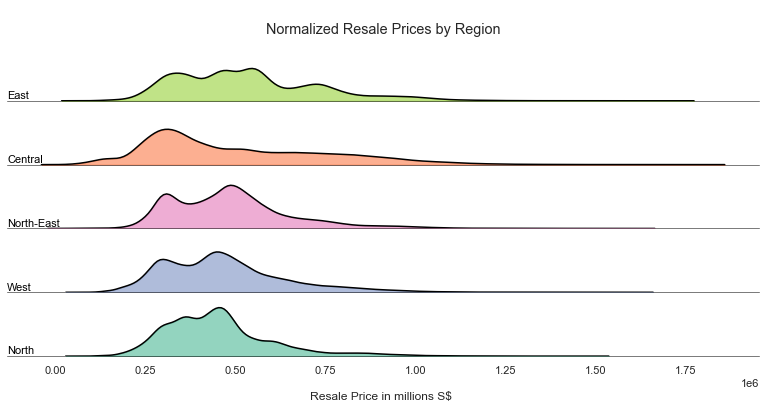

In [79]:

row_order= list(df.groupby("region").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="region", 
                  hue="region", aspect=9, height=1.2, 
                  row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .1, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "region")
g.fig.subplots_adjust(hspace=-.4)
g.set_titles("")
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True)
plt.suptitle('\nNormalized Resale Prices by Region', y=0.97)
plt.tight_layout()
plt.show();
# plt.savefig('region_price_breakout.png');


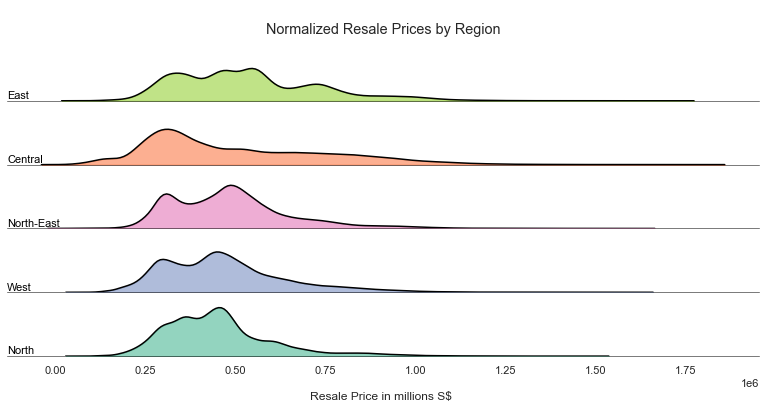

In [14]:

row_order= list(df.groupby("region").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="region", 
                  hue="region", aspect=9, height=1.2, 
                  row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .1, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "region")
g.fig.subplots_adjust(hspace=-.6)
g.set_titles("")
g.set(yticks=[], xlabel="\nResale Price in millions S$ \n", ylabel="")
g.despine(left=True)
plt.suptitle('\nNormalized Resale Prices by Region', y=0.97)
# plt.tight_layout()
plt.show();
# plt.savefig('region_price_breakout.png');


In [ ]:

row_order= list(df.groupby("region").resale_price_norm.mean().sort_values(ascending=False).index)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':.6})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="region", 
                  hue="region", aspect=9, height=1.2, 
                  row_order = row_order)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", fill=True, alpha=.7)
g.map_dataframe(sns.kdeplot, x="resale_price_norm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .1, label, color='black', fontsize=11,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "region")
g.fig.subplots_adjust(hspace=-.4)
g.set_titles("")
g.set(yticks=[], xlabel="\nHDB Flat Resale Price in millions S$ \n", ylabel="")
g.despine(left=True)
plt.suptitle('\nResale Prices by Region', y=0.97)
# plt.show(); 
plt.savefig('ridgeplot_resale_by_region_update.png', dpi=200);


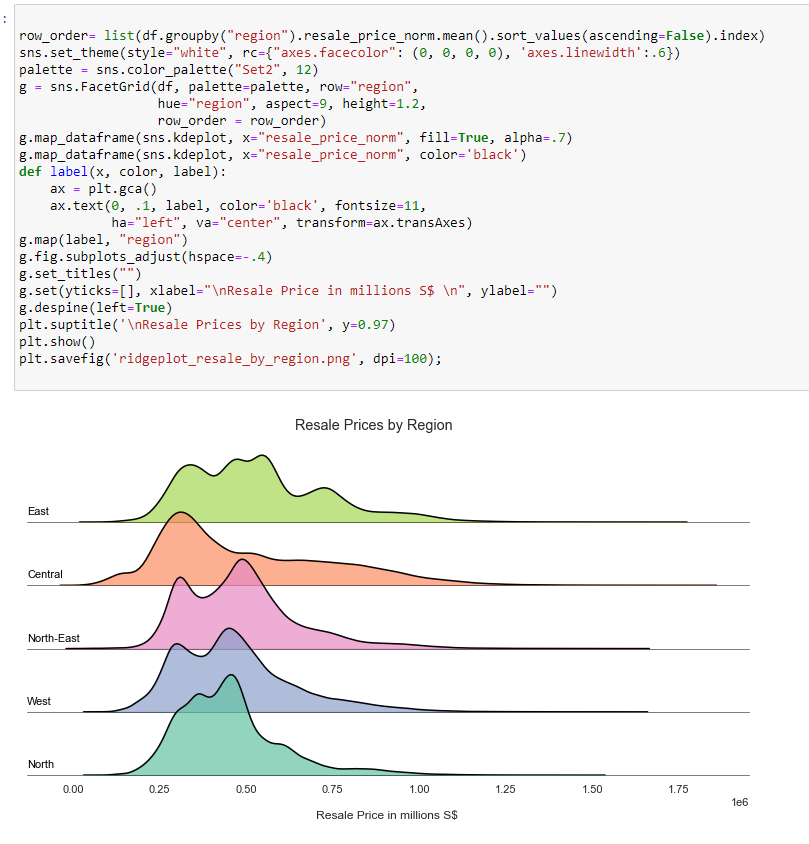

<br>

## Hex Plots

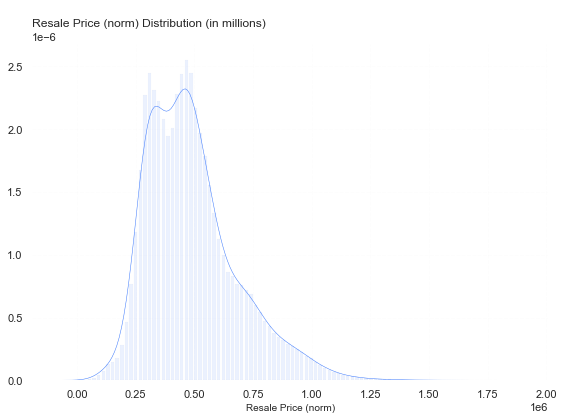

In [46]:
import seaborn as sns
sns.set_style("whitegrid")
plt.subplots(figsize=(8,6))
sns.distplot(df.resale_price_norm, 
             kde=True,
             color = 'xkcd:lightish blue', 
             kde_kws={'bw':.2, 
                      "linewidth":.5, 
                      'alpha':1},
             hist_kws={"linewidth": .1, 
                       'edgecolor':'black',
                       'alpha':.1, 
                       "rwidth":.75},
             bins=90)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('\nResale Price (norm) Distribution (in millions)\n',fontsize=12, loc="left")
plt.grid(linestyle='--', alpha=0.03)
plt.xlabel('Resale Price (norm)', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show();

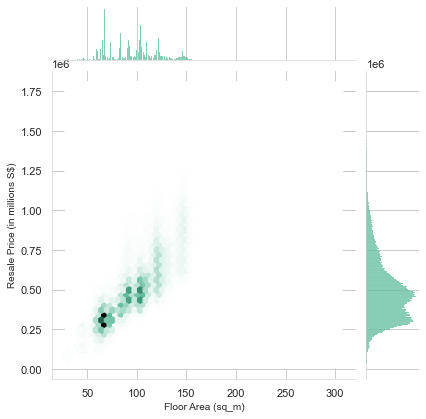

In [47]:

sns.jointplot(data=df,
             x="floor_area_sqm",
             y='resale_price_norm',
             kind='hex',
             color="#4CB391")
plt.xlabel('Floor Area (sq_m)', fontsize=10)
plt.ylabel('Resale Price (in millions S$)', fontsize=10)
# plt.savefig('hex_price_vs_floor_area.png', dpi=400);
plt.show(); 
